# Coronary Heart Disease Prediction 

In [1]:
# heart disease prediction  framingham data
'''About the dataset:

The dataset is publically available on the Kaggle website, and it is from an 
ongoing ongoing cardiovascular study on residents of the town of Framingham, 
Massachusetts. The classification goal is to predict whether the patient 
has 10-year risk of future coronary heart disease (CHD).
The dataset provides the patients’ information. It includes over 4,240
records and 15 attributes.

Attributes:

sex: male(1) or female(0);(Nominal)

age: age of the patient;(Continuous - Although the recorded ages have been 
truncated to whole numbers, the concept of age is continuous)

currentSmoker: whether or not the patient is a current smoker (Nominal)

cigsPerDay: the number of cigarettes that the person smoked on average 
in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

BPMeds: whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke: whether or not the patient had previously had a stroke
(Nominal)

prevalentHyp: whether or not the patient was hypertensive (Nominal)

diabetes: whether or not the patient had diabetes (Nominal)

totChol: total cholesterol level (Continuous)

sysBP: systolic blood pressure (Continuous)

diaBP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

heartRate: heart rate (Continuous - In medical research, variables such as 
heart rate though in fact discrete, yet are considered continuous because 
of large number of possible values.)

glucose: glucose level (Continuous)

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” 
means “No”) - Target Variable

Objective: Build a classification model that predicts heart disease in a 
subject. 
(note the target column to predict is 'TenYearCHD' where CHD = Coronary 
heart disease) '''

"About the dataset:\n\nThe dataset is publically available on the Kaggle website, and it is from an \nongoing ongoing cardiovascular study on residents of the town of Framingham, \nMassachusetts. The classification goal is to predict whether the patient \nhas 10-year risk of future coronary heart disease (CHD).\nThe dataset provides the patients’ information. It includes over 4,240\nrecords and 15 attributes.\n\nAttributes:\n\nsex: male(1) or female(0);(Nominal)\n\nage: age of the patient;(Continuous - Although the recorded ages have been \ntruncated to whole numbers, the concept of age is continuous)\n\ncurrentSmoker: whether or not the patient is a current smoker (Nominal)\n\ncigsPerDay: the number of cigarettes that the person smoked on average \nin one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)\n\nBPMeds: whether or not the patient was on blood pressure medication (Nominal)\n\nprevalentStroke: whether or not the patient had p

In [2]:
#Please do the following steps: 
#Read the file and display columns.
#Handle missing values
#exploratory analysts and describe your observations.
#Select columns that will be probably important to predict heart disease.
#If you remove columns explain why you removed those.
#Create training and testing sets (use 80% of the data for the training and
#reminder for testing).
#Build a machine learning model to predict TenYearCHD
#Evaluate the model ()
#Conclude your findings (Model which is giving best score )

In [4]:
# laod the dataset
import pandas as pd
df=pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
df.shape

(4240, 16)

In [7]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

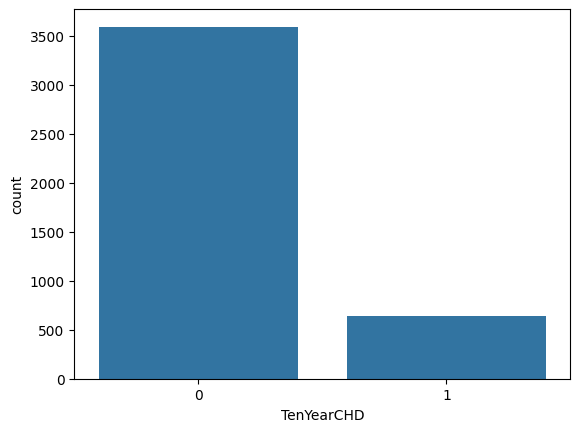

In [8]:
# display this info in a bar chart
import seaborn as sns
sns.countplot(x=df['TenYearCHD'])

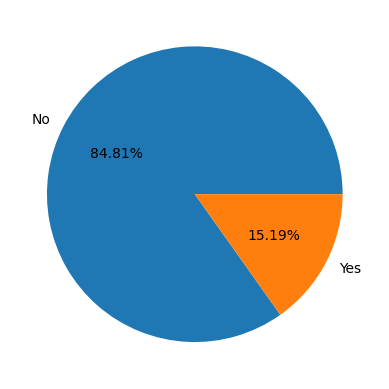

In [9]:
import matplotlib.pyplot as plt
plt.pie(df['TenYearCHD'].value_counts(),\
        labels=['No','Yes'],autopct="%0.2f%%")
plt.show()

In [10]:
# drop education column from dataset as it is not important for the 
#output
df.drop(columns=['education'],inplace=True)

In [11]:
len(df.columns)

15

In [12]:
# how many people are having no diabetes but suffered from heart disease

In [13]:
len(df.loc[(df['diabetes']==0)&(df['TenYearCHD']==1)])

604

In [14]:
# display the percentage of male and female suffered from heart disease
# which one is higher???

In [15]:
df['male'].value_counts()

male
0    2420
1    1820
Name: count, dtype: int64

In [16]:
# find how many male and female suffered form heart disease
a=len(df.loc[(df['male']==1)&(df['TenYearCHD']==1)])
a

343

In [17]:
b=len(df.loc[(df['male']==0)&(df['TenYearCHD']==1)])
b

301

In [18]:
343/1820 

0.18846153846153846

In [19]:
301/2400

0.12541666666666668

In [20]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [21]:
# how many people bellow age 40 are suffered from heart disease
len(df.loc[(df['age']<=40)&(df['TenYearCHD'])])

38

In [22]:
#  handle the missing values if any ????
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [23]:
import numpy as np
df['cigsPerDay'].replace(np.nan,df['cigsPerDay'].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7400\51537817.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cigsPerDay'].replace(np.nan,df['cigsPerDay'].mean(),inplace=True)


In [24]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [25]:
df.dropna(inplace=True)# 

In [26]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [27]:
df.shape

(3776, 15)

In [28]:
# see the corelation  ---
df.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024875,0.202304,0.324788,-0.052255,-0.002539,0.001331,0.011716,-0.069263,-0.046657,0.051634,0.074322,-0.116272,0.004864,0.095450
age,-0.024875,1.000000,-0.210550,-0.188431,0.131479,0.049945,0.304949,0.109153,0.261426,0.387411,0.204525,0.135920,-0.004244,0.119709,0.230708
currentSmoker,0.202304,-0.210550,1.000000,0.770590,-0.052827,-0.037949,-0.105636,-0.046277,-0.048146,-0.132477,-0.112807,-0.163742,0.056419,-0.052820,0.020232
cigsPerDay,0.324788,-0.188431,0.770590,1.000000,-0.046620,-0.035713,-0.067274,-0.039432,-0.030471,-0.092114,-0.056016,-0.090253,0.066904,-0.055012,0.055807
BPMeds,-0.052255,0.131479,-0.052827,-0.046620,1.000000,0.111675,0.262347,0.056521,0.088991,0.268890,0.198510,0.104697,0.009850,0.052211,0.084795
prevalentStroke,-0.002539,0.049945,-0.037949,-0.035713,0.111675,1.000000,0.065056,0.009505,0.012140,0.060296,0.054966,0.035416,-0.016742,0.015693,0.047686
prevalentHyp,0.001331,0.304949,-0.105636,-0.067274,0.262347,0.065056,1.000000,0.081956,0.163261,0.698787,0.618107,0.304496,0.142861,0.084549,0.178770
diabetes,0.011716,0.109153,-0.046277,-0.039432,0.056521,0.009505,0.081956,1.000000,0.047016,0.104173,0.051497,0.092712,0.062776,0.614987,0.093248
totChol,-0.069263,0.261426,-0.048146,-0.030471,0.088991,0.012140,0.163261,0.047016,1.000000,0.215534,0.169258,0.118852,0.097332,0.046933,0.088400
sysBP,-0.046657,0.387411,-0.132477,-0.092114,0.268890,0.060296,0.698787,0.104173,0.215534,1.000000,0.786270,0.331655,0.181791,0.131729,0.220386


<Axes: >

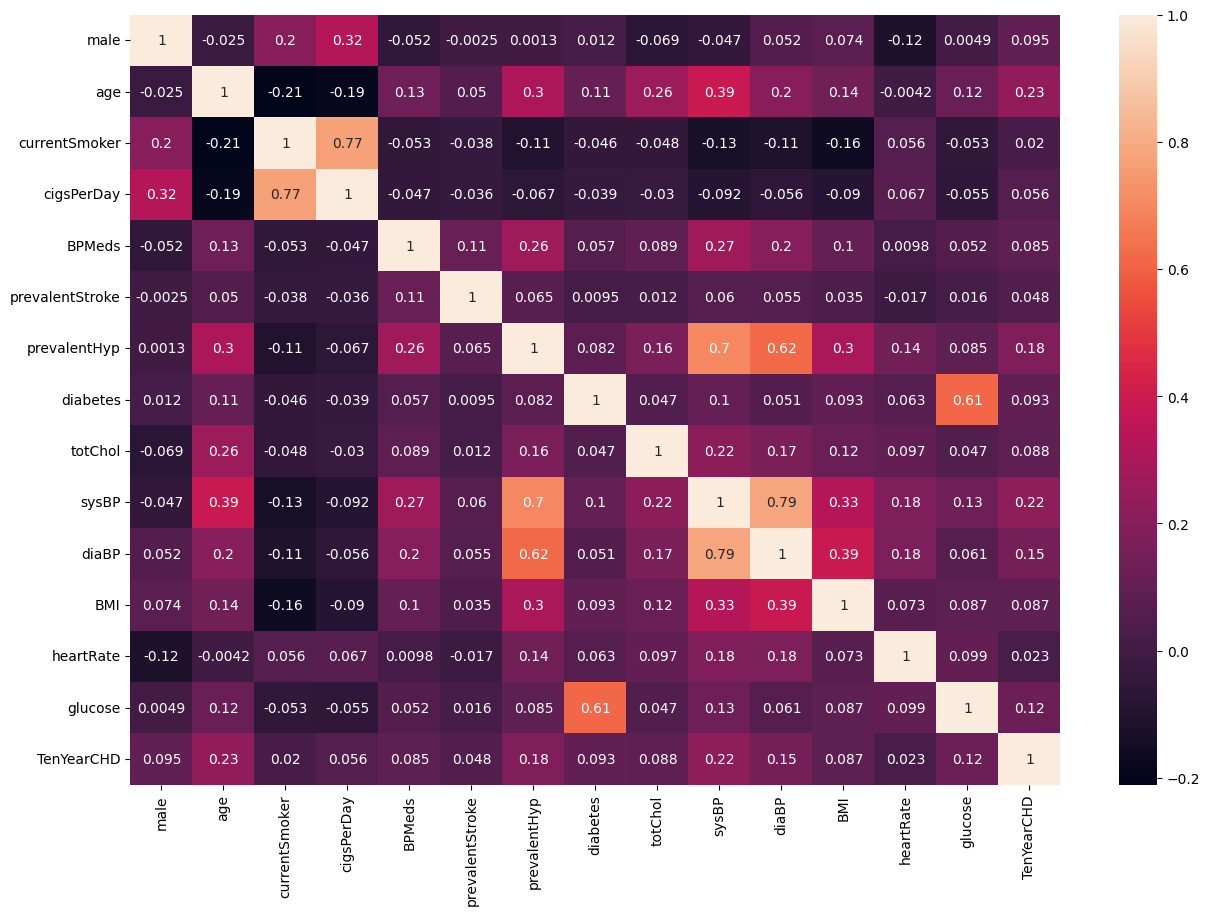

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [30]:
#  current smoker and cigs perday are highly corelated so drop one
#sysbp and diabp  are highly corelated so drop one

In [31]:
df.drop(columns=['cigsPerDay','diaBP'],inplace=True)

In [32]:
df.shape

(3776, 13)

In [33]:
#drop duplicate rows if any
df.drop_duplicates()

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,1,0.0,0,0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,1,0.0,0,1,0,225.0,150.0,28.58,65.0,103.0,1
4,0,46,1,0.0,0,0,0,285.0,130.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,0.0,0,1,0,313.0,179.0,25.97,66.0,86.0,1
4234,1,51,1,0.0,0,0,0,207.0,126.5,19.71,65.0,68.0,0
4237,0,52,0,0.0,0,0,0,269.0,133.5,21.47,80.0,107.0,0
4238,1,40,0,0.0,0,1,0,185.0,141.0,25.60,67.0,72.0,0


In [34]:
# separate input and output
X=df.drop(columns=['TenYearCHD'])
Y=df['TenYearCHD']

In [35]:
# split the data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,\
                                               random_state=7)

In [36]:
# create a model 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=5)
#train the model
rf.fit(X_train,Y_train)
#test the model
Y_pred_rf=rf.predict(X_test)
Y_pred_rf

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
X_train.shape

(3020, 12)

In [38]:
X_test.shape

(756, 12)

In [39]:
# find accuracy
from sklearn.metrics import accuracy_score
acc_rf=accuracy_score(Y_test,Y_pred_rf)
acc_rf

0.8571428571428571

In [40]:
# display the confusion matrix

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred_rf)
cm

array([[637,   9],
       [ 99,  11]], dtype=int64)